# Introduction

This notebook contains two parts. **Part 1, Logistic Regression**, provides you an opportunity to demonstrate your ability to apply course concepts by implementing a training function for logistic regression. **Part 2, Classifying Fashion Items**, provides you an opportunity to practice using widely-used ML libraries and an ML workflow to analyze a classification problem using a logistic regression model.

**You do not need to complete Part 1 in order to complete Part 2**. If you get stuck on Part 1, and choose to work on Part 2, be sure that all of your code for Part 1 runs without error. You can comment out your code in Part 1 if necessary.

# Part 1: Implementing Logistic Regression

Given a nearly-complete LogisticRegressor, and a simple training set of tumor data, demonstrate your ability to implement a logistic regression model's `fit` function, such that it properly trains its model using gradient descent.

## The LogisticRegressor

Let's first review the LogisticRegressor, which you should find familiar. Notice that the `fit` method uses a fixed number of iterations, only for simplicity and experimentation, and is stubbed to do nothing. But, also notice that the comments in `fit` describe a training process using gradient descent.

Run the code cell and observe the results.

In [1]:
import math

class LogisticRegressor:

    def __init__(self, w = 0, b = 0, alpha = 0.1):
        self.w = w
        self.b = b
        self.alpha = alpha

    def fit(self, x_train, y_train):
    # Get number of features from the first data object
        feature_count = len(x_train[0])
        for _ in range(0, 100000):
            # Determine the changes that need to be made to w
            delta_w = self._d_cost_function_w(x_train, y_train)
            # Determine the changes that need to be made to b
            delta_b = self._d_cost_function_b(x_train, y_train)
            # For each weight element in the w vector
            for feature_index in range(feature_count):
                # Update the weight (subtract the change times alpha)
                self.w[feature_index] = self.w[feature_index] - self.alpha * delta_w[feature_index]
            # Update the bias (subtract the change times alpha)
            self.b = self.b - self.alpha * delta_b                

    def cost(self, x_examples, y_class_labels):
        cost = 0
        for i in range(len(x_examples)):
            cost += self._loss(x_examples[i], y_class_labels[i])
        return cost / len(x_examples)

    def _loss(self, x, y):
        z = self._dot_product(self.w, x) + self.b
        return -y * math.log(self._sigmoid(z)) - (1 - y) * math.log(1- self._sigmoid(z))

    def _d_cost_function_w(self, x_train, y_train):
        delta_w = [0] * len(x_train[0])
        for i in range(len(x_train)):
            error = self._sigmoid(self._dot_product(self.w, x_train[i]) + self.b) - y_train[i]
            for j in range(len(delta_w)):
                delta_w[j] += error * x_train[i][j]
        for i in range(len(delta_w)):
            delta_w[i] = delta_w[i] / len(x_train)
        return delta_w

    def _d_cost_function_b(self, x_train, y_train):
        delta_b = 0
        for i in range(len(x_train)):
            delta_b += self._sigmoid(self._dot_product(self.w, x_train[i]) + self.b) - y_train[i]
        return delta_b / len(x_train)

    def predict(self, x):
        if self._sigmoid( self._dot_product(self.w, x) + self.b) >= 0.5:
            return 1
        else:
            return 0

    def _dot_product(self, a, b):
        return sum(pair[0] * pair[1] for pair in zip(a, b))

    def _sigmoid(self, exponent):
        return 1 / (1 + math.exp(-exponent))



x_train = [[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]
y_train = [0, 0, 0, 1, 1, 1]

regressor = LogisticRegressor([0, 0], 0, 0.1)
regressor.fit(x_train, y_train)

for example in x_train:
    print(f"Prediction for {example} is {regressor.predict(example)}")

print(regressor.cost(x_train, y_train))


Prediction for [0.5, 1.5] is 0
Prediction for [1, 1] is 0
Prediction for [1.5, 0.5] is 0
Prediction for [3, 0.5] is 1
Prediction for [2, 2] is 1
Prediction for [1, 2.5] is 1
0.0016974661879524142


As we can see from the output, our classifier is currently predicting only a 1, and its cost is about 0.69.

## What to Do

Your goal is to implement, in the code cell above, the `fit` function. When complete, you should see results identical to the output shown at the end of the *Exploration: Applying Logistic Regression*.

1. Implement the `fit` function in the code cell above.
2. Run the code cell frequently, and observe the output.
3. When you believe your implementation is complete, increase the number of iterations. Compare your output to what we have seen in the corresponding Exploration.
4. Rely on the functions that are already implemented for you, such as `_d_cost_function_b` and `_d_cost_function_w`.

The best tip for thinking about this challenge is to become intimately familiar with the process of gradient descent, and recognizing what `_d_cost_function_b` and `_d_cost_function_w` return. **Use the comments in the `fit` function as a general guide, not a literal line-by-line translation into code.**

You'll know your implementation is sound when the output of the code cell matches what we have seen in the *Exploration: Applying Logistic Regression*.

## 💡 Conclusion

I first started by looking back at my notebook for linear regression. After familiarizing myself with the general flow, I examined the cost functions to see what the outputs were and to check and make sure they included the changes needed for a logistic regression. I was happy to see the cost function already looped through the weights and provided a list. After that, it was easy to follow the pseudocode and simply invoke the existing functions. The only slight change I made from the process in the linear regression code was waiting to multiply by the alpha until the line that updated the weights and bias. I only realized I needed to do this when I ran the code and experienced an error. I changed the number of steps as shown in the exploration and got the same results.

# Part 2: Classifying Fashion Items

In this, the second, part of this notebook, you will observe a non-annotated implementation of a machine learning process, and enhance it with descriptive markdown cells and additional code. Your goal is to narrate and improve an experiment that measures the performance of the [scikit-learn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model for classifying images of fashion items. We'll use the popular [Fashion MNIST data set](https://github.com/zalandoresearch/fashion-mnist) by Xiao, Rasul, and Vollgraf. Take a moment now to [familiarize yourself with the version of this data set](), and also take a look at [a version of this data on Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist).

Unlike prior notebooks, in which you are given either a guided framework of steps, or provided explicit code to try, in this notebook the code shall be your framework. Your goal is to break apart this one big code cell into a cohesive, multi-section, narrated Notebook, that guides the reader through the machine learning process. You have seen and practiced this in prior Notebooks, and you are encouraged to replicate the spirit of our past work here.

In other words, below you have a bunch of code. Your goal is to:

1. Narrate a machine learning process
2. Explain what the code is doing, and add to it as necessary
3. Experiment, tune the model, and discuss your results

Your Notebook should consist of many sections, with each section representing a step in the machine learning process. The first section, **Problem Statement**, has been completed for you. Each section should start with a markdown cell containing a descriptive second-level header, and at least a few sentences that prepare the reader for what the purpose of the step is.

Each section should consist of both prose, in markdown cells, and code cells. Almost every section should consist of multiple markdown and code cells. You should often add to the provided code. For example, if you have a section on exploring data, you should probably do more than just look at the `head` and `shape`.

Your first step is to run the code block, and spend time with each line of code to discern how it reflects some unit of work in our machine learning process.

In the end, demonstrate how you modify the experiment and/or tune the model to increase the accuracy of the model. (Spend time with the [official documentation of the data set](https://github.com/zalandoresearch/fashion-mnist). What is the human accuracy score? Can your model surpass it when validated with the complete training set?)


## Problem Statement

Our goal is to automate the identification of images of ten different kinds of fashion items, from t-shirts to ankle boots. To do so, we will attempt to train a logistic regression model using a well-prepared data set of images of fashion items. Our goal is to tune our end-to-end machine learning process, and to tune our classification model, to see how accurately it may predict the correct class label of different fashion items.

## Step 1: Exploring the data

Our first step in any machine learning process is understanding our data. The data we will be using is the popular Fashion MNIST data set by Xiao, Rasul, and Vollgraf. The data comes from this website: https://www.kaggle.com/datasets/zalando-research/fashionmnist. 

If you follow the link, you will see it provides two different csv files. One is called "fashion-mnist_test" and the other is called "fashion-mnist_train". The metadata on the website says the training set has 60,000 examples and the testing set has 10,000 examples. Let's load both into the notebook and print the length of each to check. We will import and use the package pandas to load the csv files.

In [2]:
import pandas as pd

fashion_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
fashion_test_set = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
print("Length of training data: " + str(len(fashion_data)))
print("Length of testing data: " + str(len(fashion_test_set)))   

Length of training data: 60000
Length of testing data: 10000


This confirms what the website told us. Now let's figure out exactly what the data means. The kaggle website above gives us a very clear description of the data is. Let's read it:

"Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image."

Now let's confirm what the website tells us. 

In [3]:
print("Shape of the training set: " + str(fashion_data.shape))
print("Shape of the testing set: " + str(fashion_test_set.shape))

Shape of the training set: (60000, 785)
Shape of the testing set: (10000, 785)


There are 785 columns in both datasets, which makes sense because each picture is 28x28 pixels, so that means there are 784 total. This leaves one column for the labels. Next let's use the pandas `.describe` method to make sure the values for each column are what we expect from our reading.

In [4]:
fashion_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


We see that the 'label' column is indeed the first column, and that it ranges from 0 to 9. We also see all the columns for the pixels, with values ranging from 0 to 255 as expected. This all looks great. Let's check the testing set.

In [5]:
fashion_test_set.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


We see the same things for the testing set as we saw for the training set.

Let's make sure we understand the 'label' column. From the kaggle website that provides that data, it tells is that each integer from 0 to 9 represents a different type of clothing. The key is provided below: 

0 T-shirt/top,
1 Trouser,
2 Pullover,
3 Dress,
4 Coat,
5 Sandal,
6 Shirt,
7 Sneaker,
8 Bag,
9 Ankle boot.

It will be helpful later on to create a python dictionary mapping these numbers to the description. We will create that below:

In [6]:
labels = {
    0: 'T-shirt / Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

We now have a solid understanding of the data we are using. The next step is getting the data ready for input into our machine learning algorithm.  

## Step 2: Getting the data ready for training and testing

Our first step is splitting the labels from the features. The labels are in the first column, and we can use that information to divide up the dataframe. The features will be stored in the variable "X", and all the labels will be stored in the variable "Y". Let's check using the `.head` method from pandas to make sure we split the data correctly. 

In [7]:
X = fashion_data[fashion_data.columns[1:]]
Y = fashion_data['label']
X.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This looks like what we want for the training features. The 'label' column is gone, and we have all the pixel columns from 1 to 784. Let's check the labels.

In [8]:
Y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

Although it's not formatted as a table, we see the first 5 values of the labels. They range from 0 to 9, which is what we expect. 

Now that we have the labels split from the features, let's visualize the image and the label for a few random data objects. To do this, let's define a function that prints the label for a data object then plots the image stored in the pixel values. Our dictionary comes in handy here. We need to import the matplotlib package to help with plotting.

In [9]:
import matplotlib.pyplot as plt

def display_image(features, numeric_label):
    print(f"Class: {labels[numeric_label]}")
    plt.imshow(features.reshape(28, 28))

Now with the function set up, let's use it to visualize some images. The next 3 code blocks will print the label and then plot the image below it for data objects with index 0, 10, and 59999.

Class: Pullover


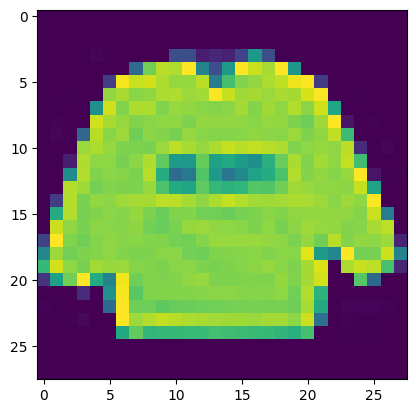

In [10]:
display_image(X.loc[0].values, Y.loc[0])

Class: T-shirt / Top


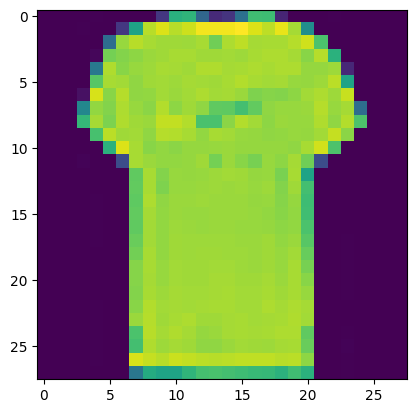

In [11]:
display_image(X.loc[10].values, Y.loc[10])

Class: Sneaker


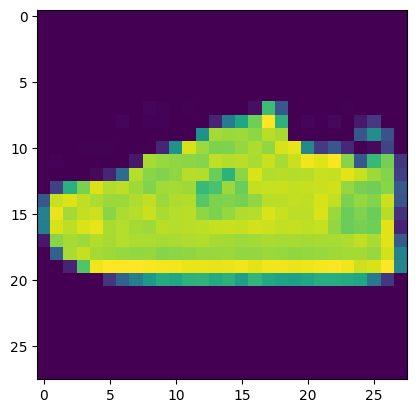

In [12]:
display_image(X.loc[59999].values, Y.loc[59999])

Each label matches the picture shown. This is great! 

Before we train the model, we need to normalize our features. This helps prevent bias in the model, because higher values are seen as more important in machine learning. Normalizing is easy here because all our features range from 0 to 255. To scale everything between 0 and 1, all we need to do is divide by 255. After that, we will use the `.head` method to make sure the values are what we would expect.

In [13]:
X = X / 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Everything looks great! 

As you saw while we were exploring our data, we have two sets of data. The training set with 60,000 objects, and the testing set with 10,000 objects. We are going to split the training set itself into training and testing data. Then, after we train, test, and adjust the model hyperparameters iteratively until we are satisfied with our result, we will use the untouched testing set for validation. This will give us additional insight into how our model will perform on unseen data. If the accuracy results for the testing and validation sets are similar, this gives us confidence that the model will generalize well. Reducing our training set will also help the model run faster, which is useful for this learning exercise. 

Let's split the training set into training and testing sets with `train_test_split` from the sklearn package. We provide the features, labels, and how much of the data we want to save for testing (0.2 is 20% of the data). Let's look at the shape to confirm.

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Training features: " + str(x_train.shape))
print("Training labels: " + str(y_train.shape))
print("Testing features: " + str(x_test.shape))
print("Testing labels: " + str(y_test.shape))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training features: (48000, 784)
Training labels: (48000,)
Testing features: (12000, 784)
Testing labels: (12000,)


We see we have 48,000 objects for training, and 12,000 objects for testing. 12,000 is 20% of 60,000, so this is exactly what we asked for. Everything looks ready for training.

## Training the model

We are finally ready to train the model. We will use the `LogisitcRegression` model from sklearn. We import it, initialize the model, and set the max iterations to 10. This is very low, but we will start with it to give us an idea of how our model will improve as we increase this.

We use the `.fit` method to train the model on our training data, and finally use the `.predict` method to make predictions on our testing data. We will compare the predictions with the true labels in the next step to see how our model performed.

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 10)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


There are many ways to evaluate how well a model performs. The simplest one is accuracy, which simply counts how many predictions matched the true label divided by the total number of objects being tested. So, if you got 10 correct out of 20, the accuracy would be 0.5. 

Precision calculates how well a model can correctly label positive samples from all the samples predicted as positive. This is measured for each class. For example, out of all the data objects that were labeled as a shirt, how many actually were a shirt? Maximizing precision is especially important when the cost of a false positive is high.

Recall calculates how well a model can find all of the positive samples in the dataset. This is again measured for each class, so a good example is out of all the objects that were actually a shirt, how many were predicted as a shirt? Maximizing recall when the cost of a false negative is high is very important.

We will look at all these metrics. We import them from sklearn, and we make sure that when calculating precision and recall each class is weighted with the number of its occurrences.

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred, normalize = True)
accuracy_count = accuracy_score(y_test, y_pred, normalize = False)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print("Number of test records:\t", len(y_test))
print("Accuracy count:\t\t", accuracy_count)
print("Acccuracy:\t\t", accuracy)
print("Precision:\t\t", precision)
print("Recall:\t\t\t", recall)

Number of test records:	 12000
Accuracy count:		 8797
Acccuracy:		 0.7330833333333333
Precision:		 0.7266990425245788
Recall:			 0.7330833333333333


We achieved an accuracy of about 73.5%. Not too bad considering we only gave it 10 iterations! Let's try increasing the iterations to 10000. We will use the same code, but will just change the iteration count. This will take much more time to run, so be patient.

In [17]:
logistic_model = LogisticRegression(max_iter = 10000)
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred, normalize = True)
accuracy_count = accuracy_score(y_test, y_pred, normalize = False)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print("Number of test records:\t", len(y_test))
print("Accuracy count:\t\t", accuracy_count)
print("Acccuracy:\t\t", accuracy)
print("Precision:\t\t", precision)
print("Recall:\t\t\t", recall)

Number of test records:	 12000
Accuracy count:		 10196
Acccuracy:		 0.8496666666666667
Precision:		 0.8483412329299972
Recall:			 0.8496666666666667


Our results improved by about 10%! Now, let's use this existing model on our validation set that we have not used yet. We need to split that data into labels and features before we use it, and normalize the features.

In [18]:
X_val = fashion_test_set[fashion_test_set.columns[1:]]
X_val = X_val/255
Y_val = fashion_test_set['label']

Now that our data is split, let's use the model to make predictions! 

In [19]:
y_pred_val = logistic_model.predict(X_val)

accuracy = accuracy_score(Y_val, y_pred_val, normalize = True)
accuracy_count = accuracy_score(Y_val, y_pred_val, normalize = False)
precision = precision_score(Y_val, y_pred_val, average = 'weighted')
recall = recall_score(Y_val, y_pred_val, average = 'weighted')

print("Number of test records:\t", len(y_pred_val))
print("Accuracy count:\t\t", accuracy_count)
print("Acccuracy:\t\t", accuracy)
print("Precision:\t\t", precision)
print("Recall:\t\t\t", recall)

Number of test records:	 10000
Accuracy count:		 8500
Acccuracy:		 0.85
Precision:		 0.8484116705434779
Recall:			 0.85


Our results are remarkably similar to the testing data we used before. This is good news! We can be confident that our model will achieve about 85% accuracy on unseen data.

## Conclusion

In this exercise, we explored the fashion MNIST dataset, and used it to create a logistic regression model that predicts clothing type based on a 28x28 pixel gray image. We achieved an accuracy of about 85% with both our testing and validation data set. 

This exercise helped us understand how to use the logistic regression model from sklearn and the essential steps in every machine learning process. We also saw the importance of setting appropriate hyperparameters, which in this case was the max iterations allowed. This is just a starting point in learning how to improve this model.